<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Interesting_Code/Lesson7_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Python Information Extraction with different approaches** 

## **1. Rule-Based Matching**

Patterns/rules are shown blew. We will use spaCy’s rule-based matcher to extract hypernym-hyponym pairs.

Tool: [SpaCy](https://spacy.io/usage/rule-based-matching)

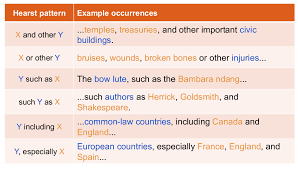

In [0]:
from IPython.display import Image
Image('https://raw.githubusercontent.com/unt-iialab/INFO5731_Spring2020/master/Interesting_Code/rule-based.png')

In [0]:
import re 
import string 
import nltk 
import spacy 
import pandas as pd 
import numpy as np 
import math 
from tqdm import tqdm 

from spacy.matcher import Matcher 
from spacy.tokens import Span 
from spacy import displacy 

pd.set_option('display.max_colwidth', 200)
# load spaCy model
nlp = spacy.load("en_core_web_sm")

### **1.1 Pattern: X such as Y**

In [0]:
# sample text 
text = "GDP in developing countries such as Vietnam will continue growing at a high rate." 

# create a spaCy object 
doc = nlp(text)
# print token, dependency, POS tag 
for tok in doc: 
  print(tok.text, "-->",tok.dep_,"-->", tok.pos_)
  #define the pattern 
pattern = [{'POS':'NOUN'}, 
           {'LOWER': 'such'}, 
           {'LOWER': 'as'}, 
           {'POS': 'PROPN'} #proper noun
           ]

# A token whose lowercase form matches such, e.g. “Such” or “SUCH”.
# A token whose is_punct flag is set to True, i.e. any punctuation.


# Matcher class object 
matcher = Matcher(nlp.vocab) 
matcher.add("matching_1", None, pattern) 
matches = matcher(doc) 
span = doc[matches[0][1]:matches[0][2]] 
print(span.text)

GDP --> nsubj --> NOUN
in --> prep --> ADP
developing --> amod --> VERB
countries --> pobj --> NOUN
such --> amod --> ADJ
as --> prep --> ADP
Vietnam --> pobj --> PROPN
will --> aux --> VERB
continue --> ROOT --> VERB
growing --> xcomp --> VERB
at --> prep --> ADP
a --> det --> DET
high --> amod --> ADJ
rate --> pobj --> NOUN
. --> punct --> PUNCT
countries such as Vietnam


In [0]:
# Matcher class object
matcher = Matcher(nlp.vocab)

#define the pattern
pattern = [{'POS':'VERB', 'OP':"?"}, # adjectival modifier
           {'POS':'NOUN'},
           {'LOWER': 'such'},
           {'LOWER': 'as'},
           {'POS': 'PROPN'}]

matcher.add("matching_1", None, pattern)
matches = matcher(doc)

span = doc[matches[0][1]:matches[0][2]]
print(span.text)

developing countries such as Vietnam


The matcher also lets you use quantifiers, specified as the 'OP' key. Quantifiers let you define sequences of tokens to be matched, e.g. one or more punctuation marks, or specify optional tokens. Note that there are no nested or scoped quantifiers – instead, you can build those behaviors with on_match callbacks.

|   OP		|   DESCRIPTION	|
|---	|---	|
|   !	|   Negate the pattern, by requiring it to match exactly 0 times.	|
|   ?		|   Make the pattern optional, by allowing it to match 0 or 1 times.	|
|   +	|   Require the pattern to match 1 or more times.	|
|   *	|   Allow the pattern to match zero or more times.	|

### **1.2 Pattern: X and/or Y**

In [0]:
doc = nlp("Here is how you can keep your car and other vehicles clean.") 

# print dependency tags and POS tags
for tok in doc: 
  print(tok.text, "-->",tok.dep_, "-->",tok.pos_)

# Matcher class object 
matcher = Matcher(nlp.vocab) 

#define the pattern 
pattern = [{'DEP':'amod', 'OP':"?"}, 
           {'POS':'NOUN'}, 
           {'LOWER': 'and', 'OP':"?"}, 
           {'LOWER': 'or', 'OP':"?"}, 
           {'LOWER': 'other'}, 
           {'POS': 'NOUN'}] 
           
matcher.add("matching_1", None, pattern) 

matches = matcher(doc) 
span = doc[matches[0][1]:matches[0][2]] 
print(span.text)

Here --> advmod --> ADV
is --> ROOT --> VERB
how --> advmod --> ADV
you --> nsubj --> PRON
can --> aux --> VERB
keep --> ccomp --> VERB
your --> poss --> DET
car --> dobj --> NOUN
and --> cc --> CCONJ
other --> amod --> ADJ
vehicles --> conj --> NOUN
clean --> oprd --> ADJ
. --> punct --> PUNCT
car and other vehicles


In [0]:
doc = nlp("Here is how you can keep your car or other vehicles clean.") 

# print dependency tags and POS tags
for tok in doc: 
  print(tok.text, "-->",tok.dep_, "-->",tok.pos_)

# Matcher class object 
matcher = Matcher(nlp.vocab) 

#define the pattern 
pattern = [{'DEP':'amod', 'OP':"?"}, 
           {'POS':'NOUN'}, 
           {'LOWER': 'and', 'OP':"?"}, 
           {'LOWER': 'or', 'OP':"?"}, 
           {'LOWER': 'other'}, 
           {'POS': 'NOUN'}] 
           
matcher.add("matching_1", None, pattern) 

matches = matcher(doc) 
span = doc[matches[0][1]:matches[0][2]] 
print(span.text)

Here --> advmod --> ADV
is --> ROOT --> VERB
how --> advmod --> ADV
you --> nsubj --> PRON
can --> aux --> VERB
keep --> ccomp --> VERB
your --> poss --> DET
car --> dobj --> NOUN
or --> cc --> CCONJ
other --> amod --> ADJ
vehicles --> conj --> NOUN
clean --> oprd --> ADJ
. --> punct --> PUNCT
car or other vehicles


### **1.3 Pattern: X, including Y**

In [0]:
doc = nlp("Eight people, including two children, were injured in the explosion") 

for tok in doc: 
  print(tok.text, "-->",tok.dep_, "-->",tok.pos_)

# Matcher class object 
matcher = Matcher(nlp.vocab) 

#define the pattern 
pattern = [{'DEP':'nummod','OP':"?"}, # numeric modifier 
           {'DEP':'amod','OP':"?"}, # adjectival modifier 
           {'POS':'NOUN'}, 
           {'IS_PUNCT': True}, 
           {'LOWER': 'including'}, 
           {'DEP':'nummod','OP':"?"}, 
           {'DEP':'amod','OP':"?"}, 
           {'POS':'NOUN'}] 
                               
matcher.add("matching_1", None, pattern) 

matches = matcher(doc) 
span = doc[matches[0][1]:matches[0][2]] 
print(span.text)

Eight --> nummod --> NUM
people --> nsubjpass --> NOUN
, --> punct --> PUNCT
including --> prep --> VERB
two --> nummod --> NUM
children --> pobj --> NOUN
, --> punct --> PUNCT
were --> auxpass --> VERB
injured --> ROOT --> VERB
in --> prep --> ADP
the --> det --> DET
explosion --> pobj --> NOUN
Eight people, including two children


### **1.4 Pattern: X, especially Y**

In [0]:
doc = nlp("A healthy eating pattern includes fruits, especially whole fruits.") 

for tok in doc: 
  print(tok.text, tok.dep_, tok.pos_)

# Matcher class object 
matcher = Matcher(nlp.vocab)

#define the pattern 
pattern = [{'DEP':'nummod','OP':"?"}, 
           {'DEP':'amod','OP':"?"}, 
           {'POS':'NOUN'}, 
           {'IS_PUNCT':True}, 
           {'LOWER': 'especially'}, 
           {'DEP':'nummod','OP':"?"}, 
           {'DEP':'amod','OP':"?"}, 
           {'POS':'NOUN'}] 
           
matcher.add("matching_1", None, pattern) 

matches = matcher(doc) 
span = doc[matches[0][1]:matches[0][2]] 
print(span.text)

A det DET
healthy amod ADJ
eating compound NOUN
pattern nsubj NOUN
includes ROOT VERB
fruits dobj NOUN
, punct PUNCT
especially advmod ADV
whole amod ADJ
fruits appos NOUN
. punct PUNCT
fruits, especially whole fruits


### **1.5 Subtree Matching for Relation Extraction**
We have to be extremely creative to come up with new rules to capture different patterns. It is difficult to build patterns that generalize well across different sentences.

To enhance the rule-based methods for relation/information extraction, we should try to understand the dependency structure of the sentences at hand.

In [0]:
text = "Tableau was recently acquired by Salesforce." 

# Plot the dependency graph 
doc = nlp(text) 
displacy.render(doc, style='dep',jupyter=True)
for tok in doc: 
  print(tok.text,"-->",tok.dep_,"-->",tok.pos_)

Tableau --> nsubjpass --> PROPN
was --> auxpass --> VERB
recently --> advmod --> ADV
acquired --> ROOT --> VERB
by --> agent --> ADP
Salesforce --> pobj --> PROPN
. --> punct --> PUNCT


In [0]:
def subtree_matcher(doc):
  subjpass = 0

  for i,tok in enumerate(doc):
    # find dependency tag that contains the text "subjpass"    
    if tok.dep_.find("subjpass") == True:
      subjpass = 1

  x = ''
  y = ''

  # if subjpass == 1 then sentence is passive
  if subjpass == 1:
    for i,tok in enumerate(doc):
      if tok.dep_.find("subjpass") == True:
        y = tok.text

      if tok.dep_.endswith("obj") == True:
        x = tok.text
  
  # if subjpass == 0 then sentence is not passive
  else:
    for i,tok in enumerate(doc):
      if tok.dep_.endswith("subj") == True:
        x = tok.text

      if tok.dep_.endswith("obj") == True:
        y = tok.text

  return x,y


subtree_matcher(nlp("Tableau was recently acquired by Salesforce."))

('Salesforce', 'Tableau')

In [0]:
subtree_matcher(nlp("Careem, a ride hailing major in middle east, was acquired by Uber."))

('Uber', 'Careem')

# 2. **Machine Learning based approaches**

Wonderful Open Source Information Extraction Projects:

https://awesomeopensource.com/projects/information-extraction

## **2.1 Open Information Extraction tools**
A curated list of Open Information Extraction (OIE) resources: research papers, code, data, applications, etc. The list is not limited to Open Information Extraction systems exclusively. It also includes work highly related to the field of OIE, such as taxonomizing open relations and using OIE in downstream applications.

https://github.com/gkiril/oie-resources

### **(1) Snips NLU**
https://github.com/snipsco/snips-nlu
https://snips-nlu.readthedocs.io/en/latest/installation.html

In [0]:
!pip install snips-nlu

     |████████████████████████████████| 143kB 2.7MB/s 
     |████████████████████████████████| 1.2MB 9.1MB/s 
     |████████████████████████████████| 6.8MB 20.7MB/s 
     |████████████████████████████████| 102kB 10.7MB/s 
     |████████████████████████████████| 757kB 42.8MB/s 


In [0]:
!snips-nlu download en

     |████████████████████████████████| 1.3MB 4.0MB/s 
  Created wheel for snips-nlu-en: filename=snips_nlu_en-0.2.3-cp36-none-any.whl size=1297477 sha256=e11ccba15c3a53670e517a3f873c6db0db6d5f1fbc967a05da8adc7e3e2e7e68
  Stored in directory: /tmp/pip-ephem-wheel-cache-zuwl7kmk/wheels/f3/f7/5a/92a6c8b31b7184c95c9fdd5c124cc17026797c0de04742f8b1
Successfully built snips-nlu-en

Linking successful
/usr/local/lib/python3.6/dist-packages/snips_nlu_en/snips_nlu_en-0.2.3 --> /usr/local/lib/python3.6/dist-packages/snips_nlu/data/en



In [0]:
from __future__ import unicode_literals, print_function
import io
import json
from snips_nlu import SnipsNLUEngine
from snips_nlu.default_configs import CONFIG_EN
with open("lights_dataset.json") as f:
  sample_dataset = json.load(f)
nlu_engine = SnipsNLUEngine(config=CONFIG_EN)
nlu_engine = nlu_engine.fit(sample_dataset)
text = "Please turn the light on in the kitchen"
parsing = nlu_engine.parse(text)
parsing["intent"]["intentName"]

'turnLightOn'

In [0]:
import json

parsing = nlu_engine.parse("What will be the weather in San Francisco next week?")
print(json.dumps(parsing, indent=2))

{
  "input": "What will be the weather in San Francisco next week?",
  "intent": {
    "intentName": null,
    "probability": 0.47512188450226484
  },
  "slots": []
}


In [0]:
parsing = nlu_engine.parse("Hey, lights on in the lounge !")
print(json.dumps(parsing, indent=2))

{
  "input": "Hey, lights on in the lounge !",
  "intent": {
    "intentName": "turnLightOn",
    "probability": 0.6021556035046789
  },
  "slots": [
    {
      "range": {
        "start": 22,
        "end": 28
      },
      "rawValue": "lounge",
      "value": {
        "kind": "Custom",
        "value": "lounge"
      },
      "entity": "room",
      "slotName": "room"
    }
  ]
}


Supported builtin entities: https://snips-nlu.readthedocs.io/en/latest/builtin_entities.html

### **(2) ReVerb**

http://www.fiber-space.de/reverb2/reverb-doc/index.html#

### **(3) Stanford OpenIE**

https://pypi.org/project/stanford-openie/

## **2.2 Domain-specific Information Extraction**

### **(1) LegalNLP**

https://lexpredict-lexnlp.readthedocs.io/en/latest/modules/extract/extract.html#nlp-based-extraction-methods

### **(2) medaCy**

Medical Text Mining and Information Extraction with spaCy 

https://github.com/NLPatVCU/medaCy

### **(3) scispacy**

https://allenai.github.io/scispacy/

## 2.3 Keywords Extraction

### (1) Yet Another Keyword Extractor (YAKE)

YAKE! is a light-weight unsupervised automatic keyword extraction method which rests on text statistical features extracted from single documents to select the most important keywords of a text. 

Github: https://github.com/LIAAD/yake

### (2) rake-nltk

RAKE short for Rapid Automatic Keyword Extraction algorithm, is a domain independent keyword extraction algorithm which tries to determine key phrases in a body of text by analyzing the frequency of word appearance and its co-occurance with other words in the text.

Github: https://github.com/csurfer/rake-nltk

Tutorial: https://www.airpair.com/nlp/keyword-extraction-tutorial

### (3) TextRank 

TextRank uses unsupervised methods for keyword and sentence extraction.

https://github.com/JRC1995/TextRank-Keyword-Extraction

### (4) pke - python keyphrase extraction

pke is an open source python-based keyphrase extraction toolkit. It provides an end-to-end keyphrase extraction pipeline in which each component can be easily modified or extended to develop new models. pke also allows for easy benchmarking of state-of-the-art keyphrase extraction models

https://github.com/boudinfl/pke

### (5) Keyword-Extraction using BERT

Deep Keyphrase Extraction using BERT. using BERT Token Classification Model to extract keywords from a sentence. 

https://github.com/ibatra/BERT-Keyword-Extractor

https://github.com/ibatra/BERT-Keyword-Extractor/blob/master/BERT-Keyword%20Extractor.ipynb

## 2.4 Named Entity recognition


### (1) Spacy

Overview in the general domain: https://pahulpreet86.github.io/name-entity-recognition-pre-trained-models-review/

https://spacy.io/usage/linguistic-features#named-entities


### (2) Spark NLP

GitHub: https://github.com/JohnSnowLabs/spark-nlp

Google Colab: https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/streamlit_notebooks/NER_EN.ipynb 

### (3)  bert-base-NER:
https://huggingface.co/dslim/bert-base-NER

### (4) bio-bert-ner:

https://github.com/dmis-lab/biobert

https://github.com/ncbi-nlp/bluebert

## Recommended: TextRazor (Extract meaning from text)

https://www.textrazor.com/